In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive

/content/drive/MyDrive


In [3]:
cd /content/drive/MyDrive/D-NeRF

/content/drive/MyDrive/D-NeRF


In [4]:
cd /content/drive/MyDrive/D-NeRF/torchsearchsorted

/content/drive/MyDrive/D-NeRF/torchsearchsorted


In [5]:
!pip  install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/drive/MyDrive/D-NeRF/torchsearchsorted
  Preparing metadata (setup.py) ... done
  Created wheel for torchsearchsorted: filename=torchsearchsorted-1.1-cp39-cp39-linux_x86_64.whl size=6578514 sha256=80aa9318aded742ceac7d28394622bfcfc5de8a81e2754b9b826fa6fc7b00396
  Stored in directory: /tmp/pip-ephem-wheel-cache-4jk4clb9/wheels/1f/95/b8/c0107fb76ea006fff0d1aa2ff3db23756f7d4060ccaedd8911
Successfully built torchsearchsorted


In [7]:
cd ..

/content/drive/MyDrive/D-NeRF


In [13]:
!wget -c https://www.dropbox.com/s/25sveotbx2x7wap/logs.zip?dl=0

--2023-04-08 06:19:03--  https://www.dropbox.com/s/25sveotbx2x7wap/logs.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/25sveotbx2x7wap/logs.zip [following]
--2023-04-08 06:19:03--  https://www.dropbox.com/s/raw/25sveotbx2x7wap/logs.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc749144cb086b5e717a1a9a623c.dl.dropboxusercontent.com/cd/0/inline/B5waYy9tE-Gcws4P0dUp1434yvw4ZKuh4WfbFRVzbmLCsdI1OzVCY0QL5aJBrpU_vrpgV3eDIl4JZ7akj5PDCE_rTguc0pViTwispqxLGiB9-eGeB0fGeaBhACOO4fcTfLv8MdIWWChTn3PwtBNbHVkdwZ7LLCUfETZPdH4g7dJPZg/file# [following]
--2023-04-08 06:19:04--  https://uc749144cb086b5e717a1a9a623c.dl.dropboxusercontent.com/cd/0/inline/B5waYy9tE-Gcws4P0dUp1434yvw4ZKuh4WfbFRVzbmLCsdI1OzVCY0QL5aJBrpU_vrpgV3eDIl4JZ7akj5PDCE_

In [14]:
!unzip /content/drive/MyDrive/D-NeRF/logs.zip

Archive:  /content/drive/MyDrive/D-NeRF/logs.zip
   creating: logs/
   creating: logs/bouncingballs/
  inflating: logs/bouncingballs/800000.tar  
  inflating: logs/bouncingballs/config.txt  
   creating: logs/standup/
  inflating: logs/standup/800000.tar  
  inflating: logs/standup/config.txt  
   creating: logs/hellwarrior/
  inflating: logs/hellwarrior/800000.tar  
  inflating: logs/hellwarrior/config.txt  
   creating: logs/jumpingjacks/
  inflating: logs/jumpingjacks/config.txt  
  inflating: logs/jumpingjacks/800000.tar  
   creating: logs/hook/
  inflating: logs/hook/800000.tar    
  inflating: logs/hook/config.txt    
   creating: logs/lego/
  inflating: logs/lego/800000.tar    
  inflating: logs/lego/config.txt    
   creating: logs/mutant/
  inflating: logs/mutant/800000.tar  
  inflating: logs/mutant/config.txt  
   creating: logs/trex/
  inflating: logs/trex/config.txt    
  inflating: logs/trex/800000.tar    


In [16]:
!pip install ConfigArgParse

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from run_dnerf import config_parser, create_nerf
import matplotlib.pyplot as plt
import torch
from load_blender import pose_spherical
from run_dnerf import render_path
from run_dnerf_helpers import to8b

In [17]:
# set cuda
torch.set_default_tensor_type('torch.cuda.FloatTensor')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# get config file
config_file = "configs/mutant.txt"
parser = config_parser()
args = parser.parse_args(f'--config {config_file}')

# set render params
hwf = [400, 400, 555.555]
_, render_kwargs_test, _, _, _ = create_nerf(args)
render_kwargs_test.update({'near' : 2., 'far' : 6.})

NeRF type selected: direct_temporal
Found ckpts ['./logs/mutant/800000.tar']
Reloading from ./logs/mutant/800000.tar


## Generate Frame

In [18]:
def generate_img(time, azimuth, elevation):
    assert 0. <= time <= 1.
    assert -180 <= azimuth <= 180
    assert -180 <= elevation <= 180
    
    render_poses = torch.unsqueeze(pose_spherical(azimuth, elevation, 4.0), 0).to(device)
    render_times = torch.Tensor([time]).to(device)

    with torch.no_grad():
            rgbs, _ = render_path(render_poses, render_times, hwf, args.chunk, render_kwargs_test, render_factor=args.render_factor)
    rgbs = to8b(rgbs)
    return rgbs[0]

  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100%|██████████| 1/1 [00:34<00:00, 34.71s/it]


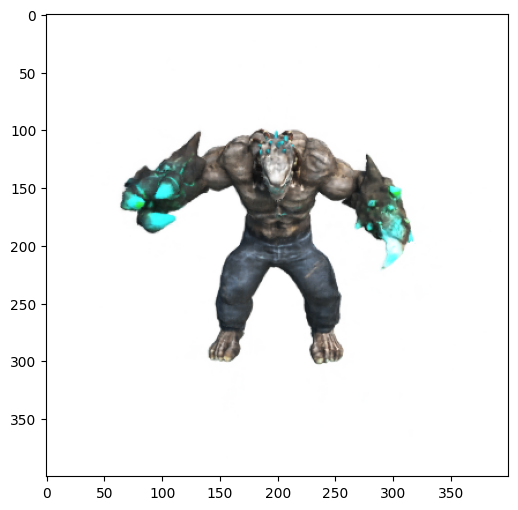

In [19]:
# genearte
time = .5  # in [0,1]
azimuth = 180  # in [-180,180]
elevation = -20  # in [-180,180]
img = generate_img(time, azimuth, elevation)

# display
plt.figure(2, figsize=(20,6))
plt.imshow(img)
plt.show()